<h1 style="text-align:center;">Step 1:Import Libraries</h1>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="text-align:center;">Loading Dataset</h2>


In [4]:
spotify_data = pd.read_csv('dataset.csv',index_col="Unnamed: 0")

<h2 style="text-align:center;">Spotify Data's info</h2>

In [6]:
print(spotify_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

<h1 style="text-align:center;">Step 2: Data Cleaning</h1>


<h2 style="text-align:center;">1)Drop irrelevant columns</h2>
<h2 style="text-align:center;">2)Handle missing values </h2>
<h2 style="text-align:center;">2)Using Lable Encoder For track_genre </h2>




In [9]:
spotify_data_cleaned = spotify_data.drop(columns=['track_name', 'artist_name', 'release_date', 'track_id','artists',"album_name"], errors='ignore')

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

spotify_data_cleaned['track_genre_encoded'] = label_encoder.fit_transform(spotify_data_cleaned['track_genre'])

In [11]:
spotify_data_cleaned.drop(columns=["track_genre"],inplace=True)

In [12]:
spotify_data_cleaned = spotify_data_cleaned.dropna()

print(spotify_data_cleaned.dtypes)  


popularity               int64
duration_ms              int64
explicit                  bool
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
track_genre_encoded      int32
dtype: object


<h1 style="text-align:center;">Exploratory Data Analysis (EDA)</h1>

<h3 style="text-align:center;">1)Plot distributions of danceability, energy, tempo </h3>

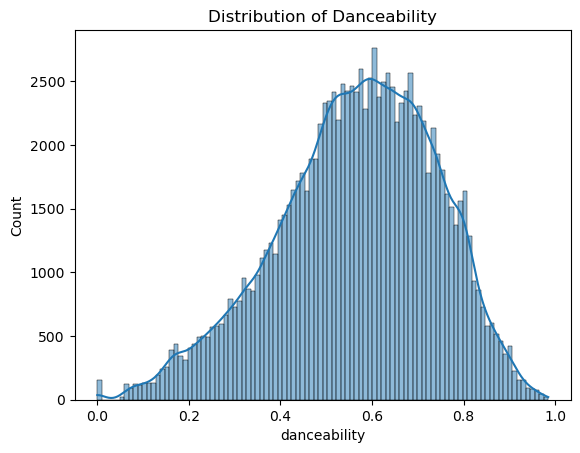

In [15]:
sns.histplot(spotify_data_cleaned['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.show()

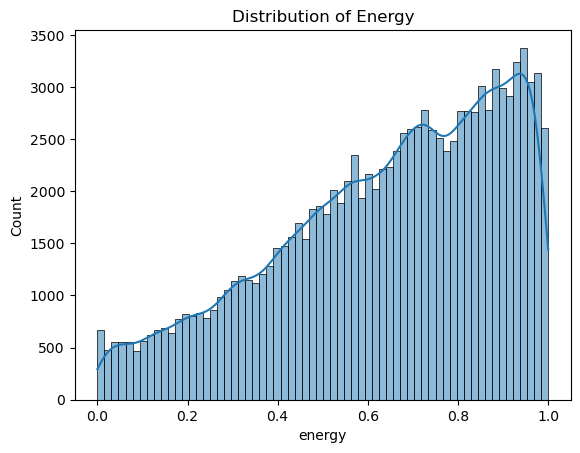

In [16]:
sns.histplot(spotify_data_cleaned['energy'], kde=True)
plt.title('Distribution of Energy')
plt.show()

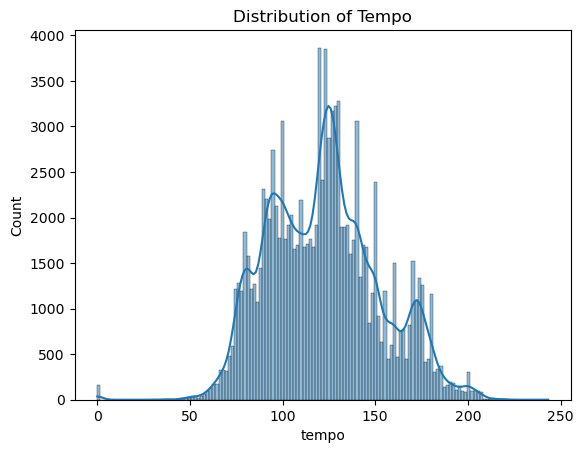

In [17]:
sns.histplot(spotify_data_cleaned['tempo'], kde=True)
plt.title('Distribution of Tempo')
plt.show()

<h1 style="text-align:center;">Investigating relationships between features and popularity</h1>

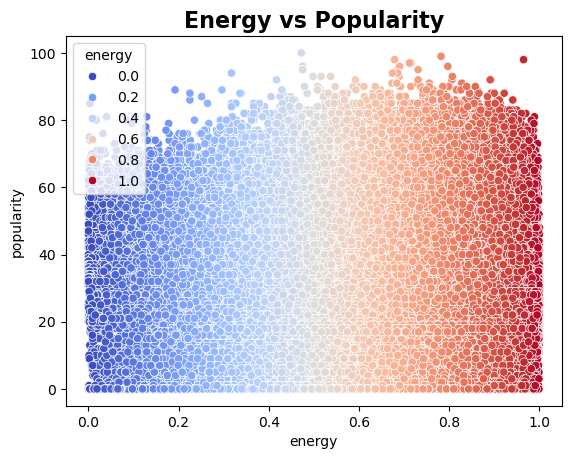

In [19]:
sns.scatterplot(x='energy', y='popularity', data=spotify_data_cleaned,hue="energy",palette='coolwarm')
plt.title('Energy vs Popularity', fontsize=16, fontweight='bold')
plt.show()

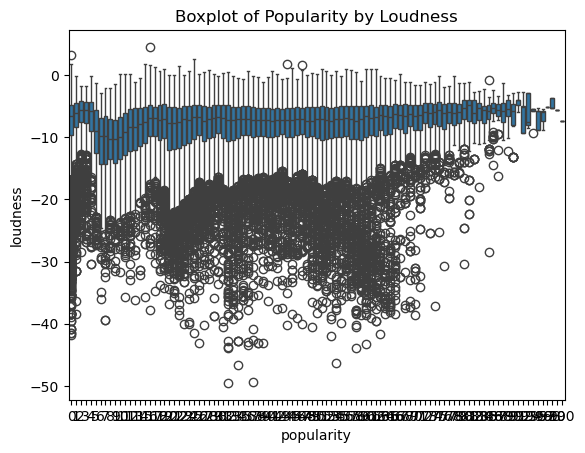

In [20]:
sns.boxplot(x='popularity', y='loudness', data=spotify_data_cleaned)
plt.title('Boxplot of Popularity by Loudness')
plt.show()


<h1 style="text-align:center;">Step 4: Feature Engineering</h1>

<h3 style="text-align:center;">Creating a new binary column 'is_popular' based on popularity > 60</h3>

In [23]:
spotify_data_cleaned['is_popular'] = (spotify_data_cleaned['popularity'] > 60).astype(int)

In [24]:
spotify_data_cleaned['energy_loudness'] = spotify_data_cleaned['energy'] * spotify_data_cleaned['loudness']

<h1 style="text-align:center;">Step 5: Splitting the Data</h1>

In [26]:
from sklearn.model_selection import train_test_split


X = spotify_data_cleaned.drop(columns=['popularity', 'is_popular'])
y = spotify_data_cleaned['is_popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1 style="text-align:center;">Step 6: Applying a Machine Learning Model</h1>
<h4 style="text-align:center;">>>>>>>>>>>>>>>>>Logistic Regression</h4>
<h4 style="text-align:center;">>>>>>>>>>>>>>Random Forest Classifier</h4>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [29]:
logreg = LogisticRegression()
rf = RandomForestClassifier()

In [30]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred_logreg = logreg.predict(X_test)

<h3 style="text-align:center;">Training accuracy of Logistic Regression Model</h3>

In [33]:
logreg.score(X_train, y_train)*100

88.03399122807018

<h3 style="text-align:center;">Testing accuracy of Logistic Regression Model</h3>

In [35]:
logreg.score(X_test, y_test)*100

88.34649122807018

<h3 style="text-align:center;">|Random Forest Classifier|</h3>

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred_rf = rf.predict(X_test)

<h3 style="text-align:center;">Training accuracy of Random Forest Model</h3>

In [40]:
rf.score(X_train, y_train)*100

99.45723684210527

<h3 style="text-align:center;">Testing accuracy of Random Forest Model</h3>

In [42]:
rf.score(X_test, y_test)*100

91.96491228070175

<h1 style="text-align:center;">Step 7: Model Evaluation</h1>

In [44]:
from sklearn.metrics import classification_report

<h3 style="text-align:center;">Classification report for Logistic Regression</h3>

In [46]:
print("-----------------------------------------------")
print("Classification Report for Logistic Regression:")
print("-----------------------------------------------")
print(classification_report(y_test, y_pred_logreg))

-----------------------------------------------
Classification Report for Logistic Regression:
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     20143
           1       0.00      0.00      0.00      2657

    accuracy                           0.88     22800
   macro avg       0.44      0.50      0.47     22800
weighted avg       0.78      0.88      0.83     22800



<h3 style="text-align:center;">Classification report for Random Forest</h3>

In [48]:
print("-----------------------------------------------")
print("Classification Report for Random Forest:")
print("-----------------------------------------------")
print(classification_report(y_test, y_pred_rf))

-----------------------------------------------
Classification Report for Random Forest:
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     20143
           1       0.86      0.37      0.52      2657

    accuracy                           0.92     22800
   macro avg       0.89      0.68      0.74     22800
weighted avg       0.92      0.92      0.90     22800



<h1 style="text-align:center;">Confusion Matrix</h1>

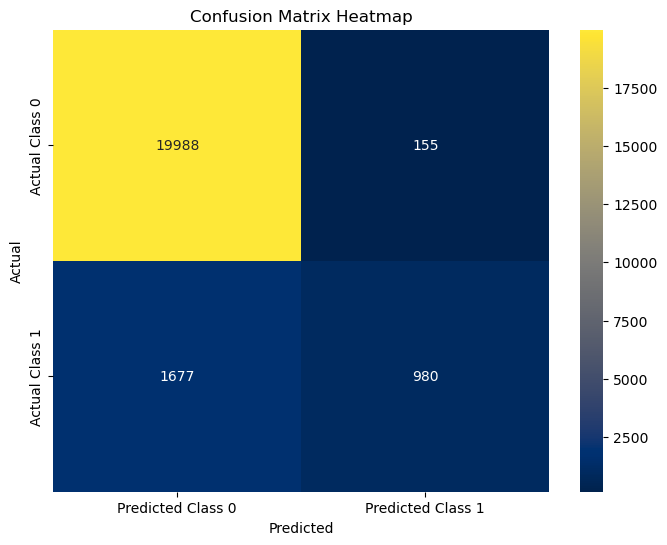

In [50]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar=True,
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')


plt.show()


<h1 style="text-align:center;">ROC Curve</h1>

In [52]:
from sklearn.metrics import roc_curve, auc

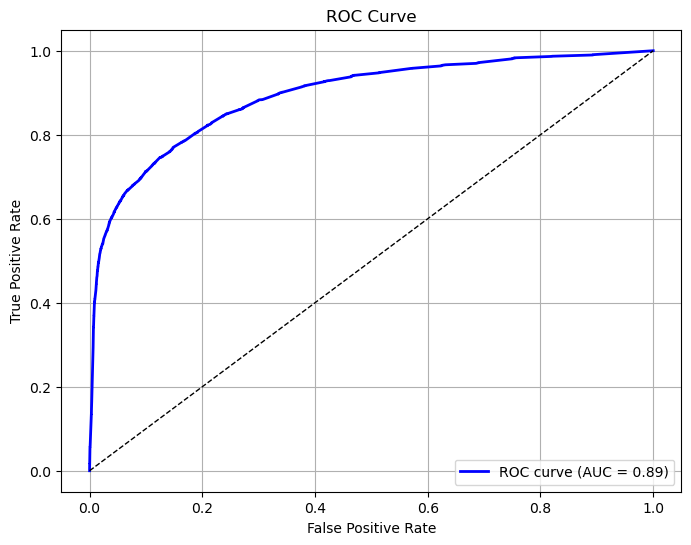

ROC AUC: 0.89


In [53]:
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


print(f"ROC AUC: {roc_auc:.2f}")


<h1 style="text-align:center;">Model Improvement</h1>

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [68]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],  
}


<h1 style="text-align:center;">Hyperparameter tuning for Random Forest</h1>

In [71]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [50, 100]},
             verbose=1)

<h1 style="text-align:center;">Best parameters and improved model</h1>

In [73]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

<h1 style="text-align:center;">Evaluation of improved model</h1>

In [75]:
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Improved Random Forest Accuracy: {best_rf_accuracy}")

Improved Random Forest Accuracy: 0.9005701754385965


<h1 style="text-align:center;">Completed</h1>
<h1 style="text-align:center;">Name:Muhammad Dawood</h1>